In [2]:
import numpy as np
arr1=np.array([[1,2,3,4],[4,5,6,7],[8,0,9,8]])
arr1.ndim
              

2

In [3]:
np.arange(30).reshape(5,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

<BarContainer object of 4 artists>

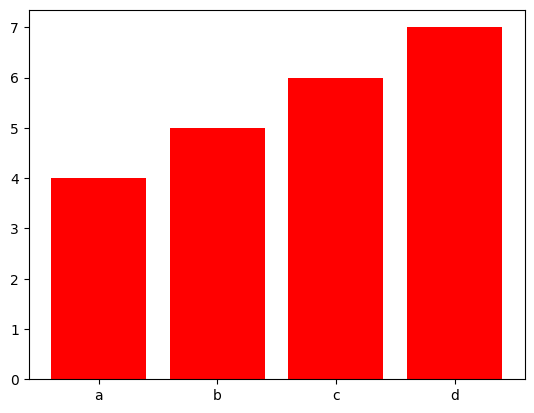

In [5]:
#barplot
cat=['a','b','c','d']
values=[4,5,6,7]
plt.bar(cat,values,color='red')

# OpenCV

In [6]:
import cv2
panda=cv2.imread("panda.jpg")

In [7]:
cv2.imshow("Panda",panda)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# writing images
image_new=panda+30
cv2.imwrite("./output.jpg",image_new)

True

In [9]:
cv2.imshow("new",image_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# DIsplaying video
import cv2
video=cv2.VideoCapture("./Hasan Raheem - Aisay Kaisay ft Abdullah Kasumbi.mp4")

In [ ]:
while True:
    ret,frame=video.read()
    if not ret:
        break
    cv2.imshow("video frames",frame)
    if cv2.waitKey(1)&0xFF==ord('q'):
        break

video.release()
cv2.destroyAllWindows()


In [10]:
panda_rgb=cv2.cvtColor(panda,cv2.COLOR_BGR2RGB)


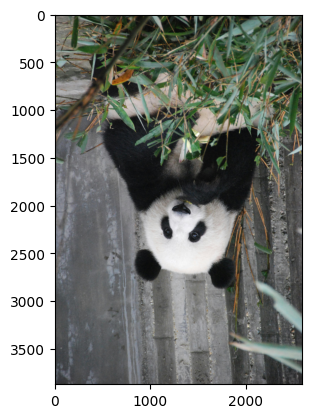

In [11]:
import matplotlib.pyplot as plt
plt.imshow(cv2.flip(panda_rgb,0)) #0,1,-1
vertical=cv2.flip(panda_rgb,0)

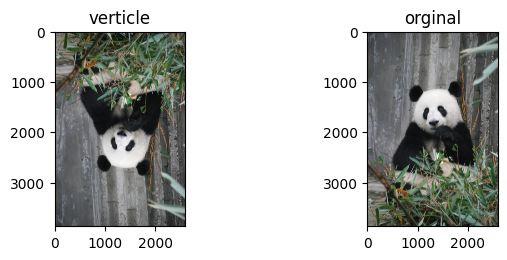

In [12]:
plt.Figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(vertical)
plt.title("verticle")
plt.subplot(2,2,2)
plt.imshow(panda_rgb)
plt.title("orginal")
plt.tight_layout()
plt.show()


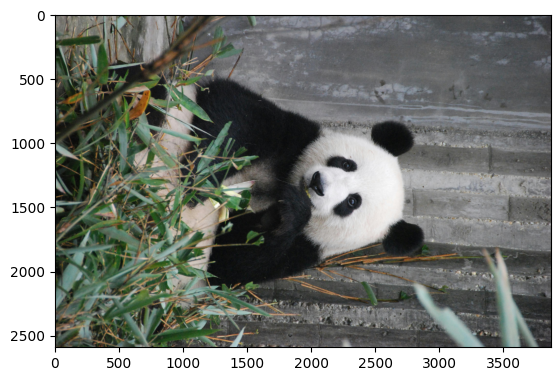

In [ ]:
rot_90=cv2.rotate(panda_rgb,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rot_90)

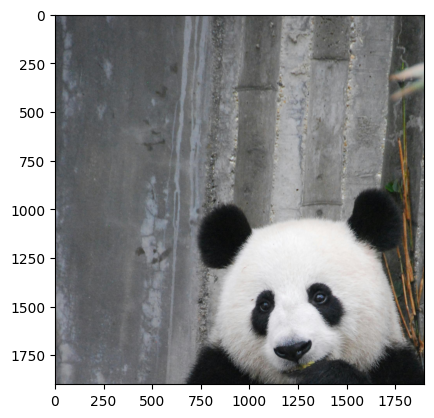

In [ ]:
x_start,y_start=100,100
x_end,y_end=2000,2000
cropped=panda_rgb[y_start:y_end,x_start:x_end]
plt.imshow(cropped)

In [ ]:
cropped.shape

(1900, 1900, 3)

## Resize

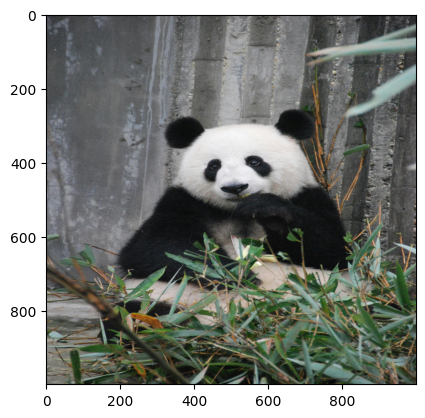

In [ ]:
new_h,new_w=1000,1000
resized_image=cv2.resize(panda_rgb,(new_w,new_h))
plt.imshow(resized_image)

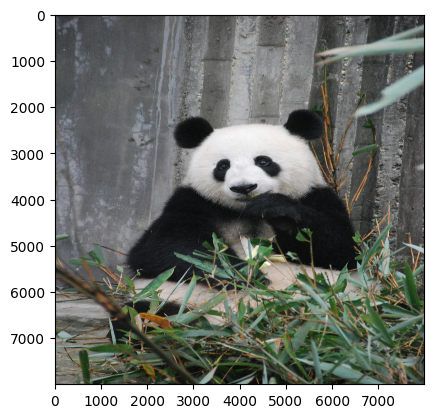

In [ ]:
# upscalling
new_h,new_w=8000,8000
upscalled=cv2.resize(panda_rgb,(new_w,new_h),interpolation=cv2.INTER_LANCZOS4) #linear,nearest cubic,bits,lanczosw4 are the algo for processing
plt.imshow(upscalled)

In [36]:
def Interpolation_complation(title,interpolation,height=1280,width=1390):
    print(interpolation)
    resized_near=cv2.resize(panda_rgb,(width,height),interpolation=interpolation)
    plt.imshow(resized_near)
    plt.title(f"Interpolation:{title}")
    plt.show()


In [27]:
x=[cv2.INTER_LINEAR,cv2.INTER_CUBIC,cv2.INTER_AREA,cv2.INTER_LANCZOS4]

In [31]:
x={"Linear":cv2.INTER_LINEAR,"Cubic":cv2.INTER_CUBIC,"AREA":cv2.INTER_AREA,"Lancoz":cv2.INTER_LANCZOS4}

In [33]:
for k,v in x.items():
    print(k,v)

Linear 1
Cubic 2
AREA 3
Lancoz 4


Linear
1


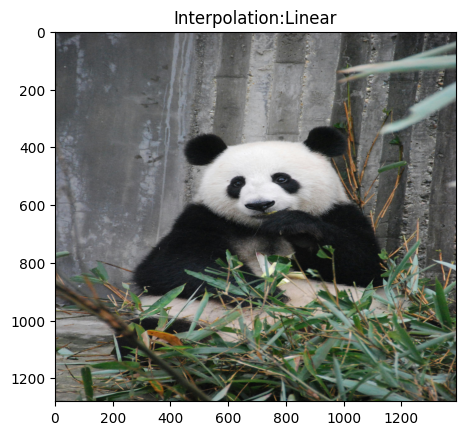

Cubic
2


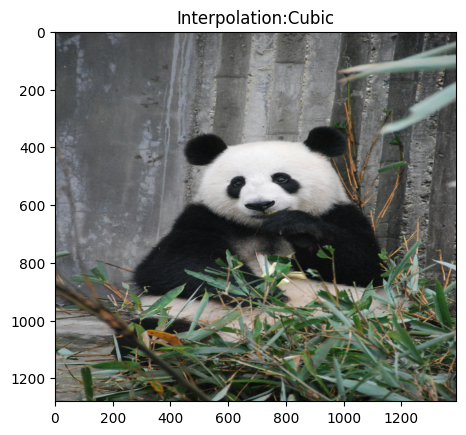

AREA
3


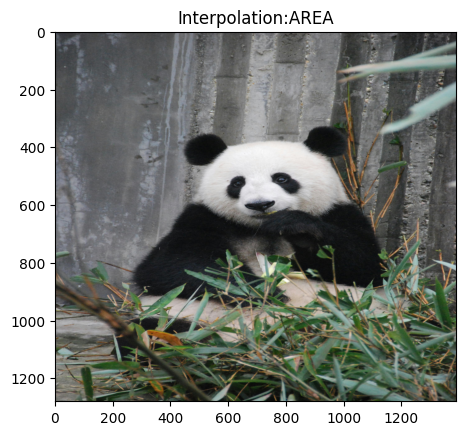

Lancoz
4


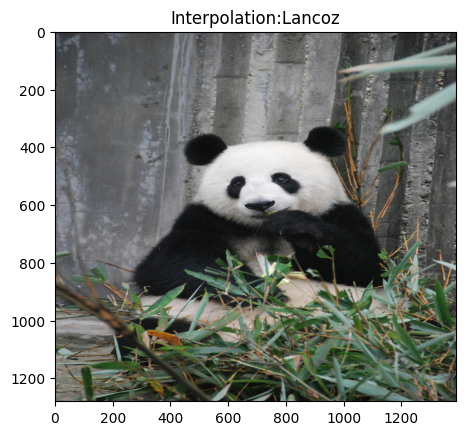

In [37]:
for k,v in x.items():
    print(k)
    Interpolation_complation(k,v)

In [ ]:
plt.Figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(vertical)
plt.title("verticle")
plt.subplot(2,2,2)
plt.imshow(panda_rgb)
plt.title("orginal")
plt.tight_layout()

# Kernals (Filters)

In [42]:
test_image=cv2.imread("./filters.png")

In [45]:
image_rgb=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

In [69]:
x=-15
horizontal_kernal=np.array([[-1,-1,-1],[x,x,x],[1,1,1]])
vertical_kernal=np.array([[-1,x,1],[-1,x,1],[-1,x,1]])
diagonal_kernal=np.array([[x,1,1],[-1,x,1],[-1,-1,x]])

In [70]:
def kernal_applier(kernal,image=image_rgb):
    filtered=cv2.filter2D(image_rgb,-1,kernal) #-1 such that output will be in same form
    return filtered

In [71]:
vertical=kernal_applier(vertical_kernal)
horizontal=kernal_applier(horizontal_kernal)
diagonal=kernal_applier(diagonal_kernal)

Text(0.5, 1.0, 'diagonal')

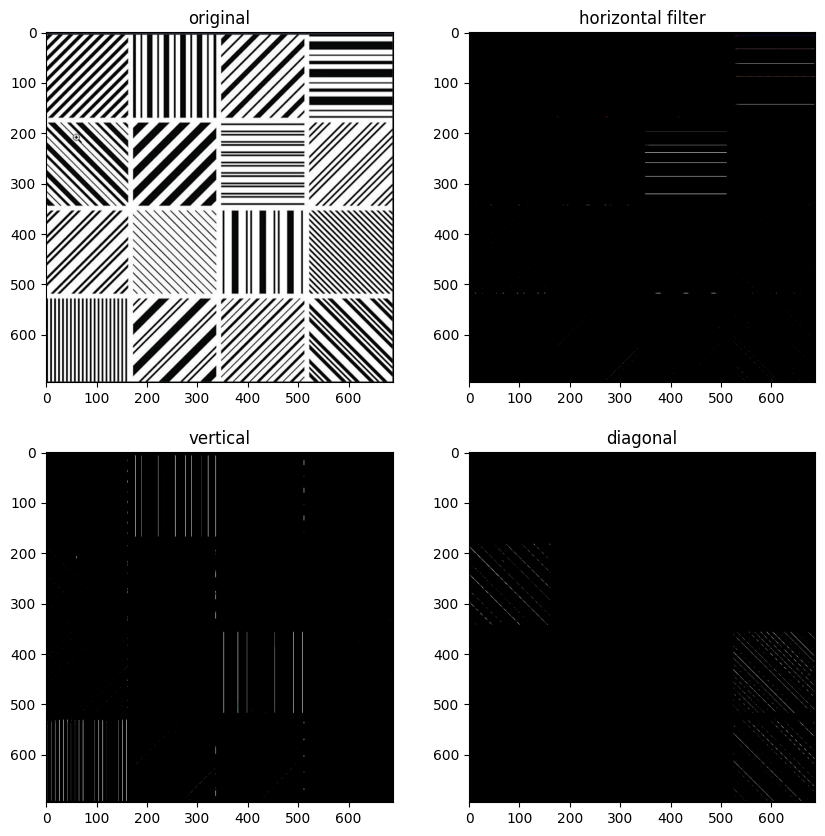

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image_rgb,cmap='gray')
plt.title('original')
plt.subplot(2,2,2)
plt.imshow(horizontal,cmap='gray')
plt.title('horizontal filter')
plt.subplot(2,2,3)
plt.imshow(vertical,cmap='gray')
plt.title('vertical')
plt.subplot(2,2,4)
plt.imshow(diagonal,cmap='gray')
plt.title('diagonal')

# Blur

1.blur

2.Gaussian

3.Median

In [2]:
import cv2
import matplotlib.pyplot as plt

In [29]:
panda=cv2.imread("./panda.jpg")

In [7]:
panda_rgb=cv2.cvtColor(panda,cv2.COLOR_BGR2RGB)

In [10]:
def blur_applier(image,kernal_b,blurtype,format=cv2.COLOR_BGR2RGB):
    blur=blurtype(image,(kernal_b,kernal_b))
    blur=cv2.cvtColor(blur,format)
    return blur

In [18]:
panda_gray=cv2.cvtColor(panda,cv2.COLOR_BGR2GRAY)

In [20]:
normal_blur=blur_applier(panda_rgb,10,cv2.blur)
median_blur=cv2.medianBlur(panda_rgb,7)
gaussian_blur=cv2.GaussianBlur(panda_rgb,(11,11),0) #never use even ksize

normal_blur_gray=blur_applier(panda_gray,10,cv2.blur)
median_blur_gray=cv2.medianBlur(panda_gray,7)
gaussian_blur_gray=cv2.GaussianBlur(panda_gray,(11,11),0) #never use even ksize



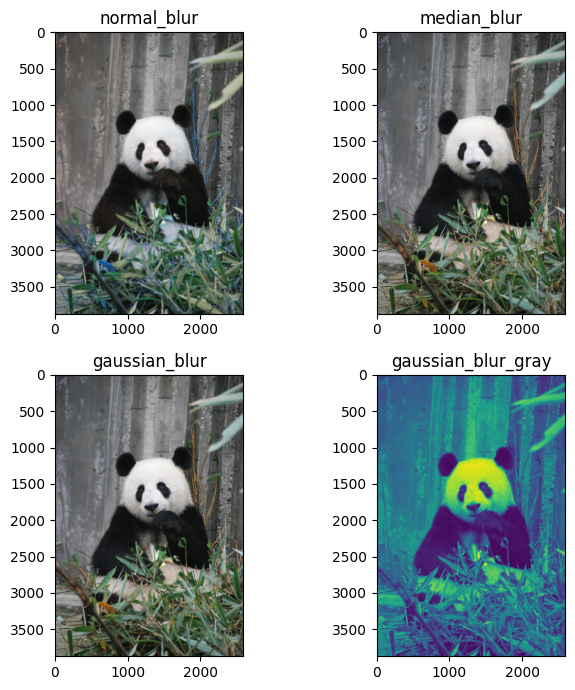

In [24]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.imshow(normal_blur)
plt.title("normal_blur")
plt.subplot(2,2,2)
plt.imshow(median_blur)
plt.title("median_blur")
plt.subplot(2,2,3)
plt.imshow(gaussian_blur)
plt.title("gaussian_blur")

plt.subplot(2,2,4)
plt.imshow(normal_blur_gray)
plt.title("normal_blur_gray")
plt.subplot(2,2,4)
plt.imshow(median_blur_gray)
plt.title("median_blur_gray")
plt.subplot(2,2,4)
plt.imshow(gaussian_blur_gray)
plt.title("gaussian_blur_gray")
plt.tight_layout()
plt.show()

# Color Thresholding and Mask Creation

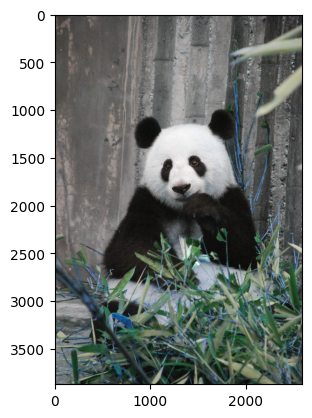

In [30]:
plt.imshow(panda)

In [31]:
# Convert the bgr image into hsv for color thresholding
panda_hsv=cv2.cvtColor(panda,cv2.COLOR_BGR2HSV)

In [1]:
import numpy as np
lower_white=np.array([0,0,0])
upper_white=np.array([50,165,100])

In [72]:
mask=cv2.inRange(panda_hsv,lower_white,upper_white)

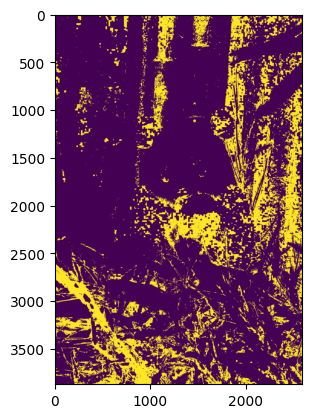

In [73]:
plt.imshow(mask)

# Drawing shapes in OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
height,width=700,800
blue=(0,130,255)# RGB
canvas=np.full((height,width,3),blue,dtype=np.uint8)


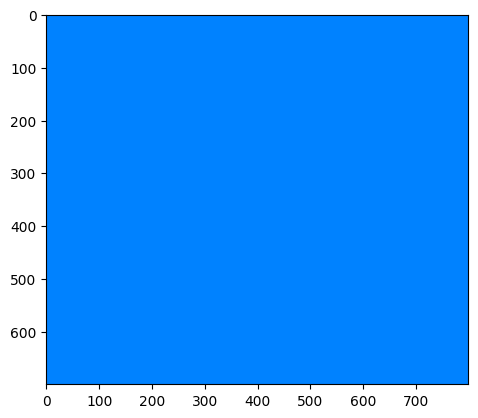

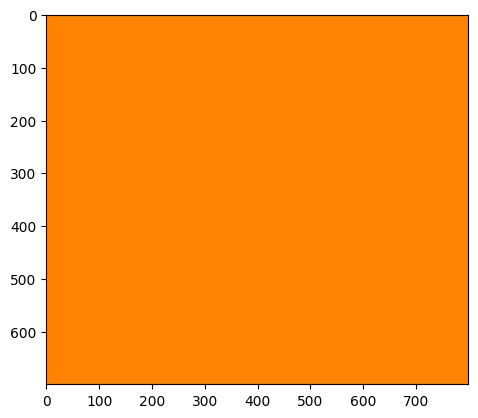

In [3]:
plt.imshow(canvas)
plt.show()
canvas_bgr=cv2.cvtColor(canvas,cv2.COLOR_RGB2BGR)
plt.imshow(canvas_bgr)
plt.show()

## Drawing a line

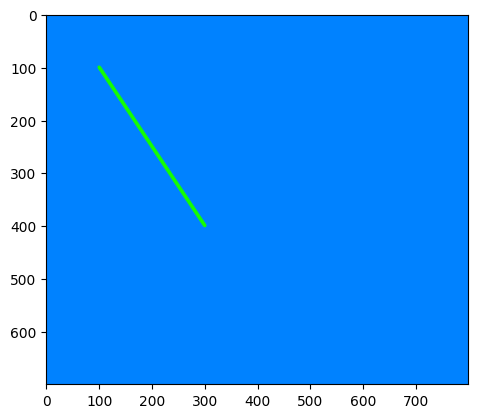

In [4]:
green=(0,255,20) #BGR
line=cv2.line(canvas_bgr,(100,100),(300,400),green,5) #(width,height)x,y
plt.imshow(cv2.cvtColor(canvas_bgr,cv2.COLOR_BGR2RGB))

# Drawing a Rectangle

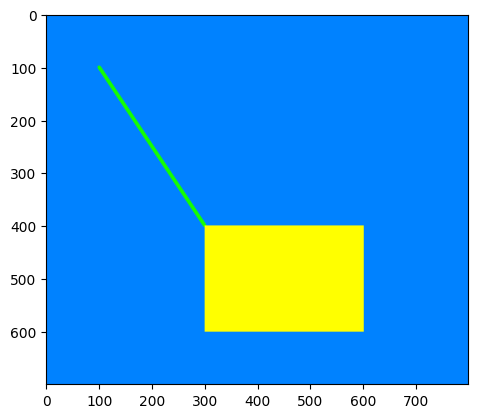

In [5]:
yellow=(0,255,255)
cv2.rectangle(canvas_bgr,(300,400),(600,600),yellow,-1)
plt.imshow(cv2.cvtColor(canvas_bgr,cv2.COLOR_BGR2RGB))

## Circle

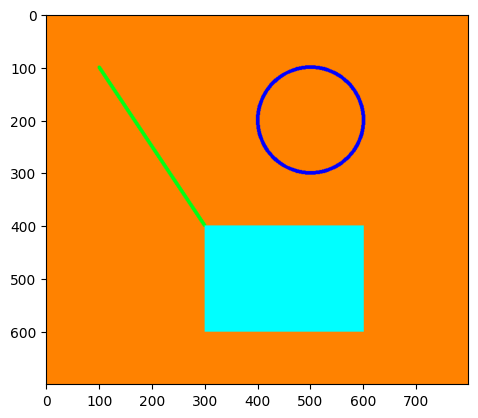

In [6]:
cv2.circle(canvas_bgr,(500,200),100,(0,0,255),5)
plt.imshow(canvas_bgr)

In [8]:
cv2.imshow("canvas",canvas_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.ellipse(canvas_bgr,(650,450),(100,50),45,0,360,(0,0,255),5)
cv2.imshow("re",canvas_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

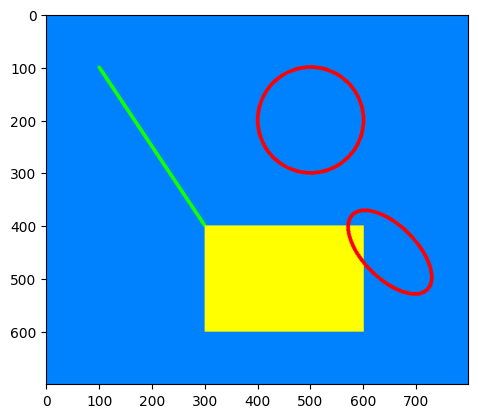

In [8]:
plt.imshow(cv2.cvtColor(canvas_bgr,cv2.COLOR_BGR2RGB))

# Edge Detection Using Sobel, Canny & Laplacian

In [2]:
image=cv2.imread("./panda.jpg",cv2.IMREAD_GRAYSCALE)

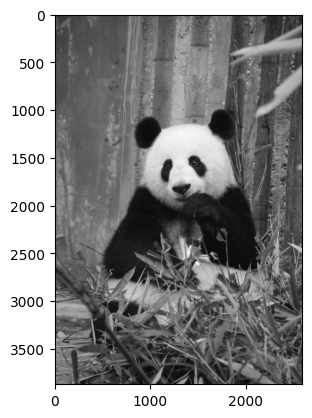

In [8]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [35]:
sobel_x=cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobel_combined=cv2.magnitude(sobel_x,sobel_y)
# Laplacian
laplacian=cv2.Laplacian(image,cv2.CV_64F,ksize=3)
laplacian_abs=cv2.convertScaleAbs(laplacian)
# Canny
canny=cv2.Canny(image,30,150)

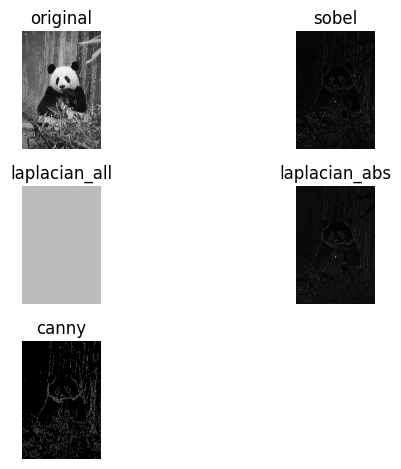

In [37]:
title=["original","sobel","laplacian_all","laplacian_abs","canny"]
images=[image,sobel_combined,laplacian,laplacian_abs,canny]

plt.Figure(figsize=(30,30))
for i in range(len(title)):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],cmap='grey')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


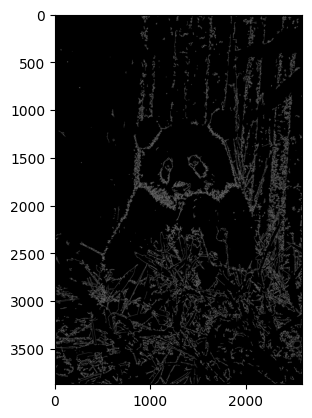

In [36]:
plt.imshow(canny,cmap='grey')

# Histogram

In [2]:
image_rgb=cv2.imread("./panda.jpg",cv2.IMREAD_COLOR_RGB)
image=cv2.imread("./panda.jpg")
image_converted_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


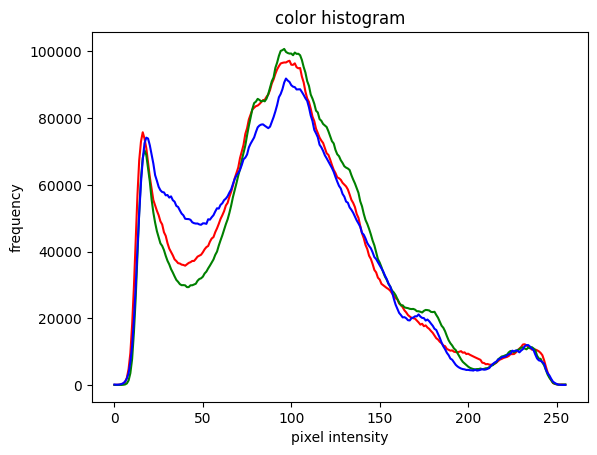

In [15]:
channels=cv2.split(image_rgb)
channels_converted=cv2.split(image_converted_rgb)
colors=['red','green','blue']
for channel,color in zip(channels,colors):
    hist=cv2.calcHist([channel],[0],None,[256],(0,256))
    plt.plot(hist,color=color)

plt.title("color histogram")
plt.xlabel("pixel intensity")
plt.ylabel("frequency")
plt.show()

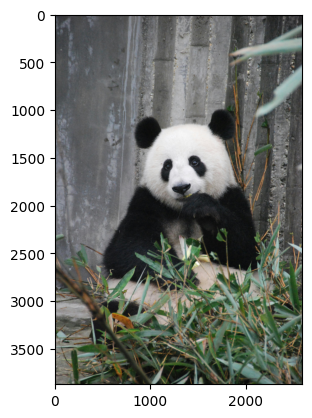

In [17]:
plt.imshow(image_rgb)

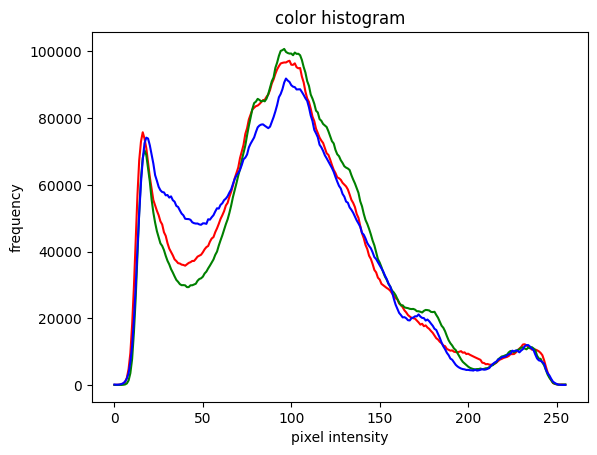

In [16]:
for channel,color in zip(channels_converted,colors):
    hist=cv2.calcHist([channel],[0],None,[256],(0,256))
    plt.plot(hist,color=color)

plt.title("color histogram")
plt.xlabel("pixel intensity")
plt.ylabel("frequency")
plt.show()

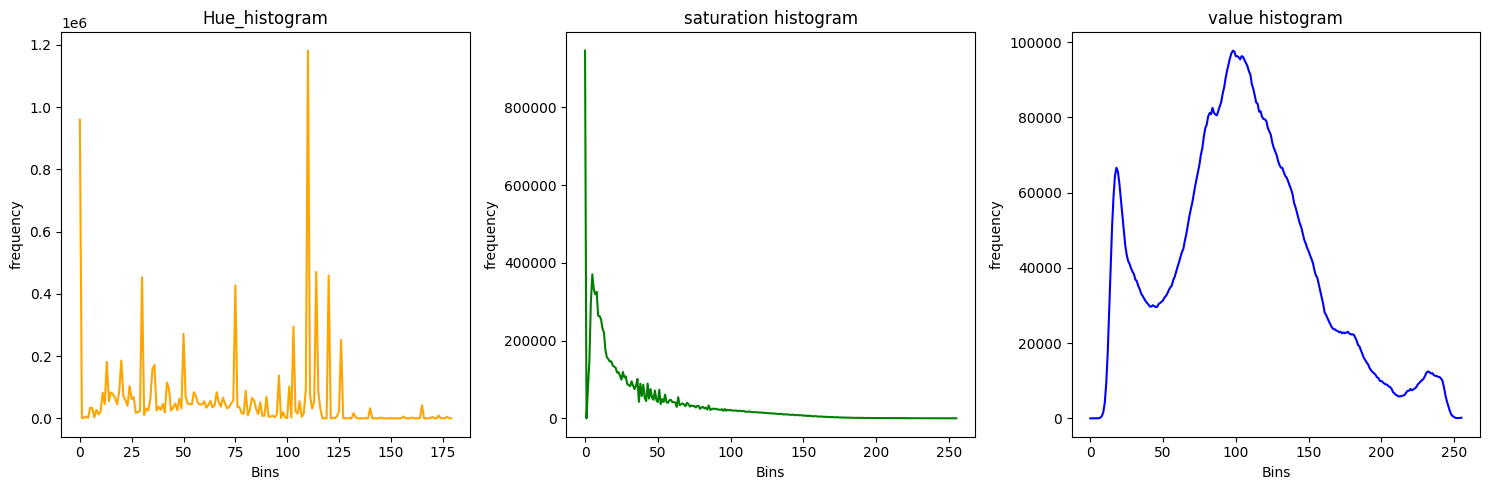

In [6]:
image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(image_hsv)

h_hist=cv2.calcHist([h],[0],None,[180],(0,180))
s_hist=cv2.calcHist([s],[0],None,[256],(0,256))
v_hist=cv2.calcHist([v],[0],None,[256],(0,256))

fig,axes=plt.subplots(1,3,figsize=(15,5))
axes[0].plot(h_hist,color="Orange")
axes[0].set_title("Hue_histogram")
axes[0].set_xlabel("Bins")
axes[0].set_ylabel("frequency")

axes[1].plot(s_hist,color="green")
axes[1].set_title("saturation histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("frequency")

axes[2].plot(v_hist,color="blue")
axes[2].set_title("value histogram")
axes[2].set_xlabel("Bins")
axes[2].set_ylabel("frequency")
plt.tight_layout()
plt.show()



# Histogram Equilization

In [10]:
image_rgb
image_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

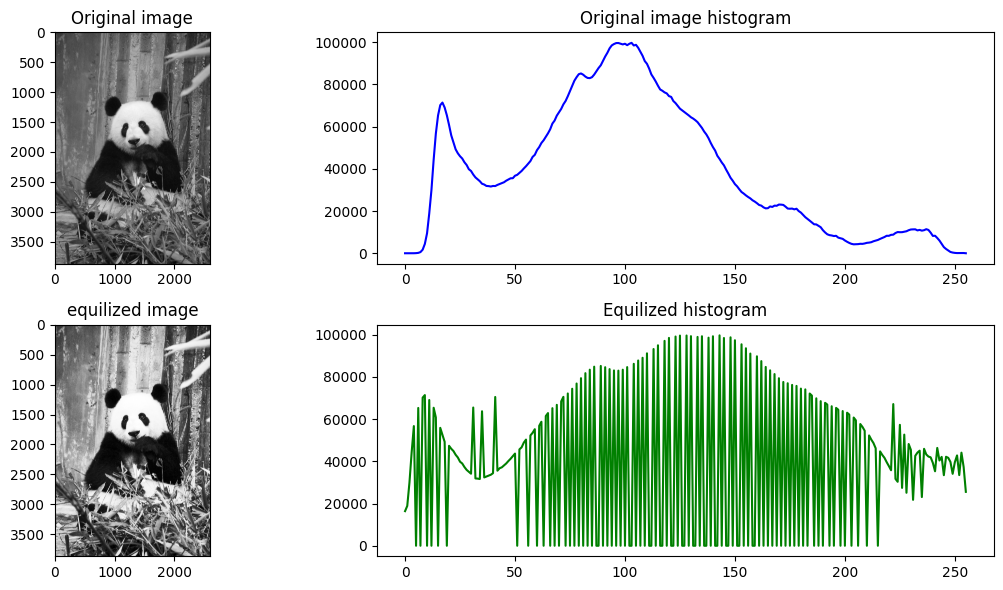

In [11]:
hist,bins=np.histogram(image_grey.flatten(),256,[0,256])

#Histogram equilization

equalized_image=cv2.equalizeHist(image_grey)
equilized_hist,bins=np.histogram(equalized_image.flatten(),256,[0,256])

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original image")

plt.subplot(2,2,2)
plt.plot(hist,color='blue')
plt.title("Original image histogram")

plt.subplot(2,2,3)
plt.imshow(equalized_image,cmap='grey')
plt.title("equilized image")

plt.subplot(2,2,4)
plt.plot(equilized_hist,color="green")
plt.title("Equilized histogram")

plt.tight_layout()
plt.show()


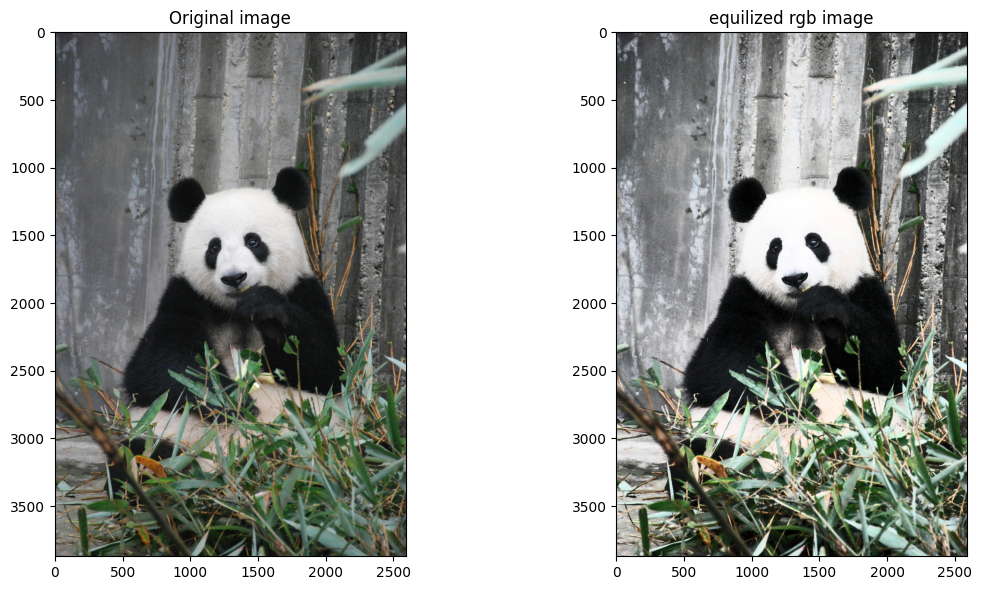

In [13]:
#LAB
#YUV #u-blue,v-red,y-brightness used in TV's
image_yuv=cv2.cvtColor(image,cv2.COLOR_BGR2YUV)

image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])

equalised_color_image=cv2.cvtColor(image_yuv,cv2.COLOR_YUV2BGR)

equilized_color_image_rgb=cv2.cvtColor(equalised_color_image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_rgb,cmap='grey')
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(equilized_color_image_rgb)
plt.title("equilized rgb image")

plt.tight_layout()
plt.show()


# CLAHE

## Contrast limited adaptive histogram equilization

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
hyena=cv2.imread("./hyena.jpg")
hyena_grey=cv2.cvtColor(hyena,cv2.COLOR_BGR2GRAY)
hyena_rgb=cv2.cvtColor(hyena,cv2.COLOR_BGR2RGB)

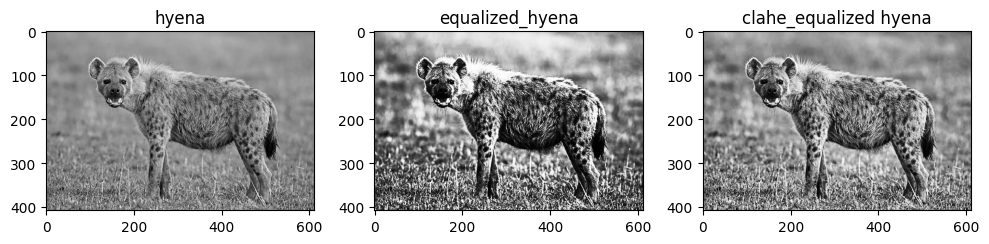

In [11]:
equalized_hyena=cv2.equalizeHist(hyena_grey)
Clache=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(4,4))
clahe_equalized_hyena=Clache.apply(hyena_grey)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(hyena_grey,cmap='grey')
plt.title("hyena")

plt.subplot(1,3,2)
plt.imshow(equalized_hyena,cmap='grey')
plt.title("equalized_hyena")

plt.subplot(1,3,3)
plt.imshow(clahe_equalized_hyena,cmap='grey')
plt.title("clahe_equalized hyena")

plt.tight_layout()
plt.show()



## Clahe on Color images

In [41]:
Clache=cv2.createCLAHE(clipLimit=1,tileGridSize=(12,12))


In [42]:
hyena_yuv=cv2.cvtColor(hyena,cv2.COLOR_BGR2YUV)
hyena_yuv[:,:,0]=Clache.apply(hyena_yuv[:,:,0])
hyena_rgb_clahe=cv2.cvtColor(hyena_yuv,cv2.COLOR_YUV2RGB)


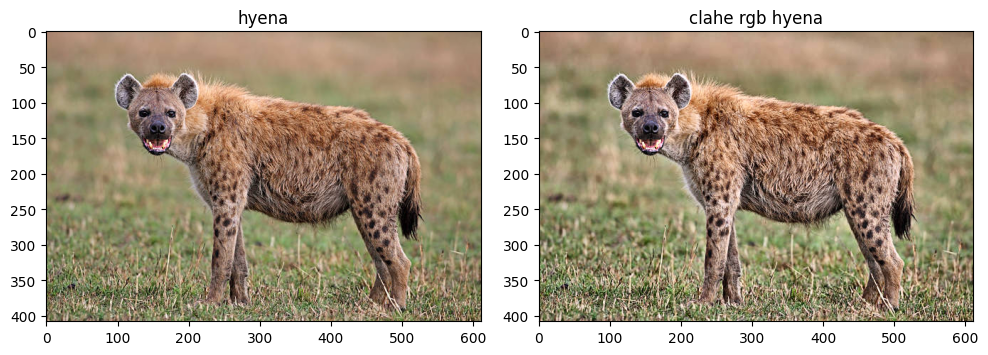

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(hyena_rgb)
plt.title("hyena")

plt.subplot(1,2,2)
plt.imshow(hyena_rgb_clahe)
plt.title("clahe rgb hyena")

plt.tight_layout()
plt.show()
